#### TO DO
 
  - Need to handle straight line general form when a = 0 or b = 0.  See work started on _calc_subtype.  Maybe need to better store the straight line data like points, gradients as these need to be passsed around for example when calculating the x and y plots.  Referencing them blind by index seems a bit poor.  Maybe pass the paramater into the init function as a dictionary.  Save as a property of graph to avoid passing all over the place between functions
  - Now that I have a graph type, it may be feasible to add circle to below
 - work on graphing the inverse - may has to be a little bit manual, use the graph type paramater in init
 - maybe work of graph transformation order page 65 of year 12 book
 - pass the raw function e.g cos (not say 3 * cos(x+2) to a function to determine the inverse
 - The issue is that the 0.5 is a float, rather than a sympy rational.  This works (tan(sp.Rational(1,2) * x) !
 - Draw arrows on graphs (although not if domain is restricted like arcos)


### <span style='color:brown'> Equation forms </span>
__Gradient intercept form__<br>
Line with a gradient of m and y-intercept of b<br>
$ y = mx + b $

__Point-gradient form__<br>
Line with a gradient of m that passes through point ($x_1, y_1$)<br>
$ y-y_1 = m (x-x_1) $


__Two-point form__<br>
Line that passes through points $(x_1, y_1)$ and $(x_2, y_2)$<br>
$ y-y_1 = \dfrac{y_2-y_1}{x_2-x_1} (x-x_1) $

__General form__<br>
$ ax + by + c = 0 $ <br>
where<br>
\* a, b, c are integers,<br>
\* a > 0

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import mpmath
plt.style.use('classic')
%matplotlib inline

In [2]:
class graph:
    
    def __init__(self, graph_type, 
                 polynomial_coefficients=[],   #Ordered from leading coefficient to contsant
                 straight_line_gradient_intercept=[], #List containing gradient and interecept
                 straight_line_point_gradient = [], #List in order of x1,y1,m
                 straight_line_two_point = [], #List in order of x1,y1,x2,y2
                 straight_line_general_form = [], #a, b, c for straight line in form ax + by + c = 0
                 domain_from = -10, domain_to=10, points_to_plot = 1000, fig_width=10, fig_height=10, 
                 x_tick_mark_type='standard', y_tick_mark_type='standard', graph_buffer_over_domain=0.1):   
        
        self.type = graph_type
        self.raw_fn = self._calc_raw_fn(polynomial_coefficients, 
                                        straight_line_gradient_intercept, 
                                        straight_line_point_gradient, 
                                        straight_line_two_point, 
                                        straight_line_general_form)
        self.fn = self._calc_fn()
        self.display_equation = self._calc_display_equation(straight_line_point_gradient, straight_line_two_point, straight_line_general_form)
        self.domain_from = domain_from
        self.domain_to = domain_to
        self.domain_set = sp.Interval(domain_from,domain_to)
        self.points_to_plot = points_to_plot
        self.fig_height = fig_height
        self.fig_width = fig_width
        self.x_tick_mark_type = x_tick_mark_type
        self.y_tick_mark_type = y_tick_mark_type
        self.x_plots = self._calc_x_plots()
        self.y_plots = self._calc_y_plots()
        self.x_intercepts_sympy_rationals = self._calc_x_intercepts_sympy_rationals()
        self.x_intercepts_floats = self._calc_x_intercepts_floats()
        self.y_intercepts_sympy_rationals = self._calc_y_intercepts_sympy_rationals()
        self.y_intercepts_floats = self._calc_y_intercepts_floats()        
        self.graph_buffer_over_domain = graph_buffer_over_domain

    
    def _calc_subtype(self, 
                      straight_line_gradient_intercept, 
                      straight_line_point_gradient, 
                      straight_line_two_point, 
                      straight_line_general_form):
        '''Calculates whether graph is a specific sub-type requiring special treatment for example straight line paralellel to one of the axis'''
        
        if self.type =='straight line gradient intercept form' and straight_line_gradient_intercept[2] = 0:
            return 'straight line parallel to x-axis' 
        else:
            return (None)

        
    def _calc_raw_fn(self, polynomial_coefficients, straight_line_gradient_intercept, straight_line_point_gradient, straight_line_two_point, straight_line_general_form):
        '''Calcualtes the "raw" function of the graph with y as a subject before any transformations such as translation, dilation etc'''
        
        x = sp.symbols('x', real = True)
        
        if self.type == 'polynomial':
            raw_fn = 0
            leading_degree = len(polynomial_coefficients) - 1
            current_degree = leading_degree
            for coefficient in polynomial_coefficients:
                raw_fn = raw_fn + coefficient * (x ** current_degree)
                current_degree = current_degree -1
                
        elif self.type =='straight line gradient intercept form':
            raw_fn = straight_line_gradient_intercept[0] * x + straight_line_gradient_intercept[1]
            
        elif self.type =='straight line point gradient form':
            # m * (x-x1) + y1
            raw_fn = straight_line_point_gradient[2] * (x - straight_line_point_gradient[0]) + straight_line_point_gradient[1]
                
        elif self.type =='straight line two point form':
            #(y2-y1)/(x2-x1)(x-x1) + y1
            raw_fn = sp.Rational((straight_line_two_point[3] - straight_line_two_point[1]), (straight_line_two_point[2] - straight_line_two_point[0])) * (x - straight_line_two_point[0]) + straight_line_two_point[1]
            
        elif self.type == 'straight line general form':
            raw_fn = -sp.Rational(straight_line_general_form[0], straight_line_general_form[1]) * x - sp.Rational(straight_line_general_form[2], straight_line_general_form[1])
            
        return (raw_fn)
    
    
    def _calc_fn(self):
        '''Calculates graph function by adding transformations such as translation, dilation etc to the raw function'''
        # TO DO
        return (self.raw_fn)

    
    def _calc_display_equation(self, straight_line_point_gradient, straight_line_two_point, straight_line_general_form ):
        '''latex format to display on graph'''
        y = sp.symbols('y', real = True)
        
        if self.type == 'straight line point gradient form':
            return (self._calc_display_equation_staight_line_point_gradient(straight_line_point_gradient))

        elif self.type == 'straight line two point form':
            return (self._calc_display_equation_staight_line_two_point(straight_line_two_point))
        
        elif self.type == 'straight line general form':
            return ('$ ' + str(straight_line_general_form[0]) + 'x + ' + str(straight_line_general_form[1]) + 'y + ' + str(straight_line_general_form[2]) + ' = 0 $')
        
        else:
            graph_equation = sp.Eq(y, self.fn)
            return '$' + sp.latex(graph_equation) + '$'
    
        
        graph_equation = sp.factor(graph_equation)
        return '$' + sp.latex(graph_equation) + '$'

    
    def _calc_display_equation_staight_line_point_gradient(self, straight_line_point_gradient):
        '''Calculates the latex display equation for straight line in point gradient format,'''
        
        x1 = straight_line_point_gradient[0]
        y1 = straight_line_point_gradient[1]
        m = straight_line_point_gradient[2]    
        
        # Flips signs to avoid display of +-
        if y1 > 0:
            latex_str = "$ (y - " + str(y1)  + ') = ' + str(m) + '(x '
        else:
            latex_str = "$ (y + " + str(-y1) + ') = ' + str(m) + '(x '
        if x1 > 0:
            latex_str = latex_str + " - " + str(x1) + ')$'
        else:
            latex_str = latex_str + " + " + str(-x1) + ')$'
        
        return (latex_str)
    
    
    def _calc_display_equation_staight_line_two_point(self, straight_line_two_point):
        '''Calculates the latex display equation for straight line in two point form'''
    
        x1 = straight_line_two_point[0]
        y1 = straight_line_two_point[1]
        x2 = straight_line_two_point[2]
        y2 = straight_line_two_point[3]        
    
        # Flips signs to avoid display of +-
        if y1 > 0:
            latex_str = '$ (y - ' + str(y1) + ')'
        else:
            latex_str = '$ (y + ' + str(-y1)+ ')'
        if y1 > 0:
            latex_str = latex_str + '=\dfrac{(' + str(y2) + ' - ' + str(y1)  + ')}{(' +str(x2)
        else:
            latex_str = latex_str + '=\dfrac{(' + str(y2) + ' + ' + str(-y1) + ')}{(' +str(x2)
        if x1 > 0:
            latex_str = latex_str + " - " + str(x1) + ' )}(x'
        else:
            latex_str = latex_str + " + " + str(-x1) + ' )}(x'
        if x1 > 0:
            latex_str = latex_str + " - " + str(x1) + ')$'
        else:
            latex_str = latex_str + " + " + str(-x1) + ')$'  
                
        return(latex_str)
    
    
    def _set_origin_spines(self, ax: plt.axes):
        '''Creates axis at x=0 and y = 0'''

        # making the top and right spine invisible:
        ax.spines['top'].set_color('none')
        ax.spines['right'].set_color('none')

        # moving bottom spine up to y=0 position:
        ax.xaxis.set_ticks_position('bottom')
        ax.spines['bottom'].set_position(('data',0))

        # moving left spine to the right to position x == 0:b
        ax.yaxis.set_ticks_position('left')
        ax.spines['left'].set_position(('data',0))


    def _AddlegendInBbox(self, ax, x0=0,y0=0, pad=0.5,**kwargs):
        '''Creates legend in a box for matplotlib'''
        
        # Adapted from here
        # https://stackoverflow.com/questions/47539628/showing-legend-under-matplotlib-plot-with-varying-number-of-plots
        otrans = ax.figure.transFigure
        t = ax.legend(bbox_to_anchor=(x0,y0), loc='lower left', bbox_transform=otrans, frameon = False, fontsize='x-large', **kwargs)
        #ax.figure.tight_layout(pad=pad)
        ax.figure.canvas.draw()
        tbox = t.get_window_extent().transformed( ax.figure.transFigure.inverted() )
        bbox = ax.get_position()
        ax.set_position([bbox.x0, bbox.y0+tbox.height,bbox.width, bbox.height-tbox.height])         
    
    
    def _discontinuities(self):
        discontinuities = sp.singularities(self.fn, x)
        discontinuities_in_domain = discontinuities.intersect(self.domain_set)
        sympy_list = list(discontinuities_in_domain)
        float_list = [float(x) for x in sympy_list]
        return (float_list)
    
    
    def _calc_x_plots(self):
        '''calc plot x-values'''
        x_vals = np.linspace(self.domain_from, self.domain_to, self.points_to_plot)
        
        # applies mask for example to prevent lines being drawn joining discontinuous portions of hyperbola, tan etc
        for discontinuity in self._discontinuities():        
            first_value_after_discontinuity=next((x for x in x_vals if x >= discontinuity), None)
            first_value_before_discontinuity=next((x for x in x_vals[::-1] if x < discontinuity), None)
            # if first_value_before_discontinuity is not None and first_value_after_discontinuity is not None:
            x_vals = np.ma.masked_where(
                (x_vals == first_value_before_discontinuity) | (x_vals==first_value_after_discontinuity), 
                x_vals)    
        
        return (x_vals)
   

    def _calc_y_plots(self):
        '''calc plot y-values'''
        fn_lambdify = sp.lambdify(x, self.fn)
        return(fn_lambdify(self.x_plots))
        

    def _calc_y_intercepts_sympy_rationals(self):        
        if self.fn.subs(x, 0) == sp.S.ComplexInfinity:
            return []
        else:
            return ([self.fn.subs(x, 0)])    
    

    def _calc_y_intercepts_floats(self):
        return_value = [float(x) for x in self.y_intercepts_sympy_rationals]
        return(return_value)        
        
    
    def _calc_x_intercepts_sympy_rationals(self):
        return(list(sp.solveset(self.fn,x, domain=self.domain_set)))        
        return(return_value)

    
    def _calc_x_intercepts_floats(self):
        return_value = [float(x) for x in self.x_intercepts_sympy_rationals]
        return(return_value)
    
 
    def _format_x_tick_mark(self, value, tick_number):
        '''Formats tick mark using the latex values of the x-intercepts in the sympy number format'''
        if self.x_tick_mark_type == 'degrees':
            degree_equivalant = sp.deg(self.x_intercepts_sympy_rationals[tick_number])
            latex_equivalent = sp.latex(degree_equivalant) + ' \degree'
        else:
            latex_equivalent = sp.latex(self.x_intercepts_sympy_rationals[tick_number])
        #use dfrac rather than frac to ensure raction characters are full size
        latex_equivalent = latex_equivalent.replace('frac', 'dfrac')         
        return ("$"  + latex_equivalent + "$")

    
    def _format_y_tick_mark(self, value, tick_number):
        '''Formats tick mark using the latex values of the y-intercepts in the sympy number format'''
        if self.y_tick_mark_type == 'degrees':
            degree_equivalant = sp.deg(self.y_intercepts_sympy_rationals[tick_number])
            latex_equivalent = sp.latex(degree_equivalant) + ' \degree'
        else:
            latex_equivalent = sp.latex(self.y_intercepts_sympy_rationals[tick_number])
        #use dfrac rather than frac to ensure raction characters are full size
        latex_equivalent = latex_equivalent.replace('frac', 'dfrac')         
        return ("$"  + latex_equivalent + "$")    

    
    def _calc_x_limits(self):
        ''' Returns a tuple of min and max value of x allowing for a buffer over the domain'''
        x_range = self.domain_to - self.domain_from
        x_lim_min = self.domain_from - (x_range * self.graph_buffer_over_domain)
        x_lim_max = self.domain_to + (x_range * self.graph_buffer_over_domain)
        return((x_lim_min, x_lim_max))

    
    def _calc_y_limits(self):
        ''' Returns a tuple of min and max value of y allowing for a buffer over the range'''    
        y_range = max(self.y_plots) - min(self.y_plots)
        y_lim_min = min(self.y_plots) - (y_range * self.graph_buffer_over_domain)
        y_lim_max = max(self.y_plots) + (y_range * self.graph_buffer_over_domain)
        return((y_lim_min, y_lim_max))
        
    def display(self):
        '''Plot the graph with matplotlib'''

        fig = plt.figure()
        ax = plt.axes()
        self._set_origin_spines(ax)

        ax.plot(self.x_plots, self.y_plots , 
                label = self.display_equation, 
                color = 'blue')
        
        ax.set(
            xlim = self._calc_x_limits(),
            ylim = self._calc_y_limits(),
            xticks = self.x_intercepts_floats,
            yticks = self.y_intercepts_floats
        )
        
        ax.xaxis.set_major_formatter(plt.FuncFormatter(self._format_x_tick_mark))
        ax.yaxis.set_major_formatter(plt.FuncFormatter(self._format_y_tick_mark))
            
        # ax.legend(loc='upper right', frameon=False, fontsize='x-large')
        self._AddlegendInBbox(ax, borderaxespad=5)

        fig.set_size_inches(self.fig_width,self.fig_height)


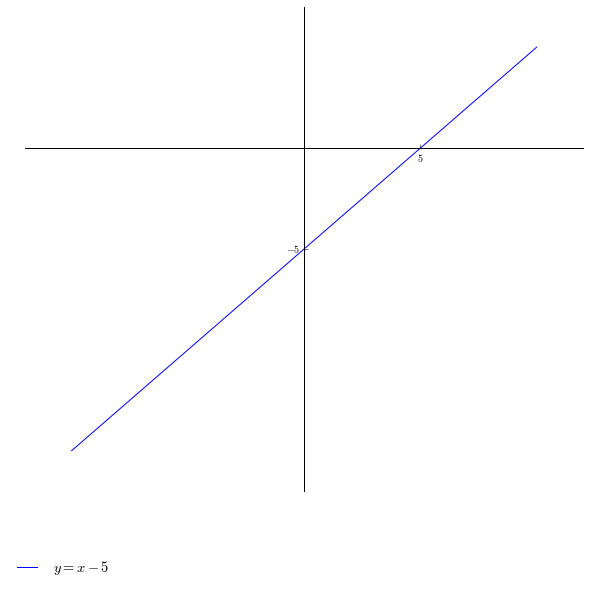

In [4]:
x = sp.symbols('x', real=True)
mygraph = graph(graph_type = 'straight line gradient intercept form', straight_line_gradient_intercept=[1,-5])
# mygraph = graph(graph_type = 'straight line point gradient form', straight_line_point_gradient=[3,5,-sp.Rational(17,3)])
 # mygraph = graph(graph_type = 'straight line two point form', straight_line_two_point= [3,-1,5,2])
# mygraph = graph(graph_type = 'straight line general form', straight_line_general_form= [10,3,-5])
# mygraph = graph(graph_type = 'straight line general form', straight_line_general_form= [0,1,-5])
# mygraph = graph(graph_type = 'polynomial', polynomial_coefficients = [sp.Rational(1,2),5,7], domain_from=-14, domain_to=12)
# mygraph = graph(fn=sp.sin(x))
# mygraph = graph(fn = 2*x-5)
# mygraph = graph(fn = 1/(x+1), domain_from=-10, domain_to=10, points_to_plot=1000)
# mygraph = graph(fn=sp.tan(x), domain_from=-10, domain_to=10, points_to_plot=1000)
# mygraph = graph(fn=sp.tan(sp.Rational(1,2) * x), domain_from=-10, domain_to=10, points_to_plot=1000)
# mygraph = graph(fn=5*sp.cos(sp.Rational(2,2) * x), domain_from=-10, domain_to=10, points_to_plot=1000) # , x_tick_mark_type = 'degrees'
# mygraph = graph(fn=sp.Abs(x-3)-2, domain_from=-10, domain_to=10)
# mygraph = graph(fn = 5**(-x)-7)
# mygraph = graph(fn=5 * sp.cos(x), domain_from=-10, domain_to=10, points_to_plot=1000, x_tick_mark_type = 'radians')
# mygraph = graph(fn = sp.acos(x), domain_from=-1, domain_to = 1) # , y_tick_mark_type = 'degrees' 
# mygraph = graph(fn = sp.asin(x), domain_from=-1, domain_to = 1)



mygraph.display()

In [ ]:
mygraph.y_plots